# Fig5. Comparison among disciplinary backgrounds of researchers and projects 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

#### Define researchers and projects data path

In [2]:
file_path_i = "data/mapeo_investigadores.csv"
file_path_p = "data/mapeo_proyectos.csv"

#### Define function to clean researchers data

In [3]:
def prepare_data(investigadores, proyectos, number_of_areas):
    investigadores = read_csv(file_path_i)
    mini = investigadores[["Área de procedencia/disciplina","ID investigador"]]
    mini.columns = ["disciplina", "id"]
    # split disciplinary backgrounds in rows with ","
    filtered_df = mini.loc[mini["disciplina"].str.contains(', ')]
    mini = mini.loc[mini["disciplina"].str.contains(', ') != True]
    new_discp = []
    for row in filtered_df.itertuples():
        for disciplina in row.disciplina.split(", "):
            new_discp.append([disciplina, row.id])
    fix_df = pd.DataFrame(new_discp, columns=["disciplina", "id"])
    mini = mini.append(fix_df)
        
    grouped = mini.groupby("disciplina")
    df_investigadores = grouped.count().sort_values(by=['id'], ascending=False)
    df_investigadores["pcts"] = df_investigadores.apply(lambda x:100 * x / float(x.sum()))
    df_investigadores.columns = ["count_i", "researchers"]

    proyectos = read_csv(file_path_p)
    mini = proyectos[["Área de procedencia/disciplina","ID investigadores"]]
    proyectos.drop_duplicates(subset ="ID investigadores", keep = "first") 
    mini.columns = ["disciplina", "id"]
        
    # split disciplinary backgrounds in rows with ","
    filtered_df = mini.loc[mini["disciplina"].str.contains(', ')]
    mini = mini.loc[mini["disciplina"].str.contains(', ') != True]
    new_discp = []
    for row in filtered_df.itertuples():
        for disciplina in row.disciplina.split(", "):
            new_discp.append([disciplina, row.id])
    fix_df = pd.DataFrame(new_discp, columns=["disciplina", "id"])
    mini = mini.append(fix_df)
    
    grouped = mini.groupby("disciplina")
    df_proyectos = grouped.count().sort_values(by=['id'], ascending=False)
    df_proyectos["pcts"] = df_proyectos.apply(lambda x:100 * x / float(x.sum()))
    df_proyectos.columns = ["count_p", "projects"]
    
    result = df_investigadores.join(df_proyectos, how='outer')
    result = result.drop(columns=['count_p', 'count_i'])
    result = result.sort_values(by=['projects'], ascending=False)
    
    return result.head(number_of_areas)

#### Function to translate disciplinary backgrounds

In [4]:
def translate(dataframe, column_to_translate, translations_filename):    
    translations_df = read_csv(f"data/{translations_filename}.csv")
    translations_df.columns=["disciplina", "disciplinary_background"]
    df_def = pd.merge(dataframe, translations_df, on=column_to_translate, how='inner', validate="one_to_many")
    return df_def

#### Run program
## Change 'num_of_discp' to show as many disciplinary backgrounds as you want'

In [5]:
num_of_discp = 15
investigadores = read_csv(file_path_i)
proyectos = read_csv(file_path_p)
df2 = prepare_data(investigadores, proyectos, num_of_discp)
df2 = translate(df2, "disciplina", "disciplinas")

#### Print horizontal bar plot

<Figure size 432x288 with 0 Axes>

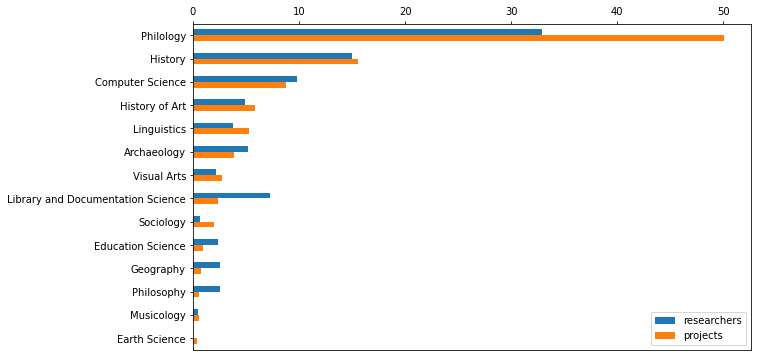

In [6]:
plt.figure()
ax = df2.plot.barh(x="disciplinary_background", figsize=(10,6), legend=True)
ax.set_ylabel("")
ax.xaxis.tick_top() 
ax.invert_yaxis()
plt.show()